In [2]:
import pandas as pd
file="nba2k20-full.csv"
df=pd.read_csv(file)
df.head(20)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df['length'] = df['college'].str.len()

df.describe()

,rating,draft_year,length
count,429.000000,429.000000,363.000000
mean,76.372960,2014.093240,8.258953
std,5.657748,3.937678,3.279628
min,67.000000,2001.000000,3.000000
25%,72.000000,2012.000000,6.000000
50%,75.000000,2015.000000,8.000000
75%,79.000000,2017.000000,10.000000
max,97.000000,2019.000000,18.000000


In [ ]:

df.describe(include='O')

,full_name,jersey,team,position,b_day,height,weight,salary,country,draft_round,draft_peak,college
count,429,429,406,429,429,429,429,429,429,429,429,363
unique,429,52,30,7,415,20,84,308,39,3,57,111
top,LeBron James,#0,Milwaukee Bucks,G,09/19/96,6-6 / 1.98,215 lbs. / 97.5 kg.,$1416852,USA,1,Undrafted,Kentucky
freq,1,79,17,169,2,50,23,20,323,257,67,26


In [ ]:

df.isna().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
length         66
dtype: int64

In [ ]:
df['jersey'] = df['jersey'].fillna('unknown')
df['team'] = df['team'].fillna('unknown')

df.isna().sum()

full_name       0
rating          0
jersey          0
team            0
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
length         66
dtype: int64

In [ ]:
df['jersey']=df['jersey'].str.upper()
df['team']=df['team'].str.upper()
df['position'] = df['position'].str.upper()

In [ ]:
df[df['jersey'].str.contains('10')]

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,length
23,Mike Conley,87,#10,UTAH JAZZ,G,10/11/87,6-1 / 1.85,185 lbs. / 83.9 kg.,$32511623,USA,2007,1,4,Ohio State,10.0
24,DeMar DeRozan,87,#10,SAN ANTONIO SPURS,G-F,08/07/89,6-6 / 1.98,220 lbs. / 99.8 kg.,$27739975,USA,2009,1,9,USC,3.0
119,Evan Fournier,78,#10,ORLANDO MAGIC,G,10/29/92,6-7 / 2.01,190 lbs. / 86.2 kg.,$17150000,France,2012,1,20,NaN,NaN
120,Eric Gordon,78,#10,HOUSTON ROCKETS,G,12/25/88,6-3 / 1.91,215 lbs. / 97.5 kg.,$14057730,USA,2008,1,7,Indiana,7.0
137,Darius Garland,77,#10,CLEVELAND CAVALIERS,G,06/26/00,6-1 / 1.85,175 lbs. / 79.4 kg.,$6400920,USA,2019,1,5,Vanderbilt,10.0
224,Jake Layman,75,#10,MINNESOTA TIMBERWOLVES,F,03/07/94,6-8 / 2.03,209 lbs. / 94.8 kg.,$3581986,USA,2016,2,47,Maryland,8.0
271,Jaxson Hayes,74,#10,NEW ORLEANS PELICANS,F-C,05/23/00,6-11 / 2.11,220 lbs. / 99.8 kg.,$4862040,USA,2019,1,8,Texas,5.0
286,Dorian Finney-Smith,73,#10,DALLAS MAVERICKS,F,05/04/93,6-7 / 2.01,213 lbs. / 96.6 kg.,$4000000,USA,2016,Undrafted,Undrafted,Florida,7.0
321,Jared Dudley,72,#10,LOS ANGELES LAKERS,F,07/10/85,6-6 / 1.98,225 lbs. / 102.1 kg.,$2564753,USA,2007,1,22,Boston College,14.0
356,Ty Jerome,72,#10,PHOENIX SUNS,G,07/08/97,6-5 / 1.96,195 lbs. / 88.5 kg.,$2193480,USA,2019,1,24,Virginia,8.0


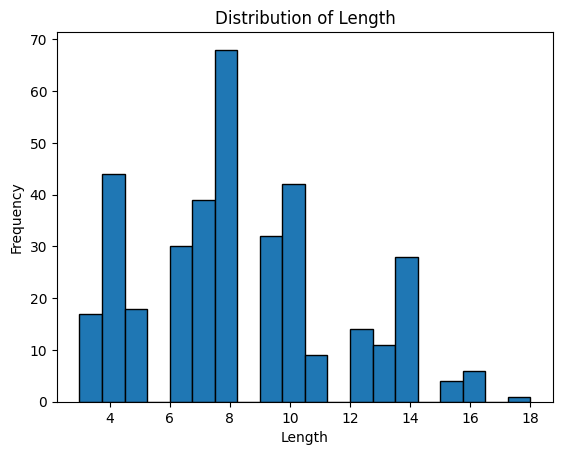

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['length'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Length')
plt.show()


<Axes: ylabel='Frequency'>

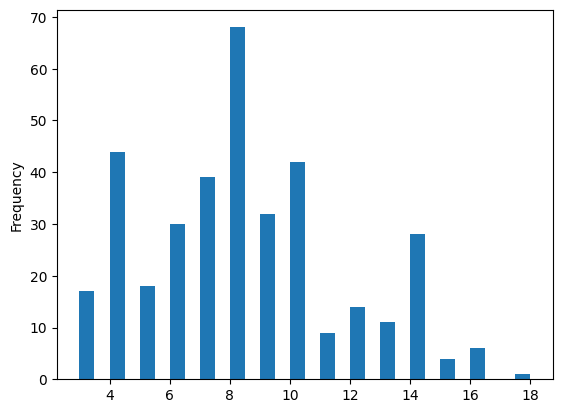

In [ ]:
df['length'].plot(kind='hist', bins=30)

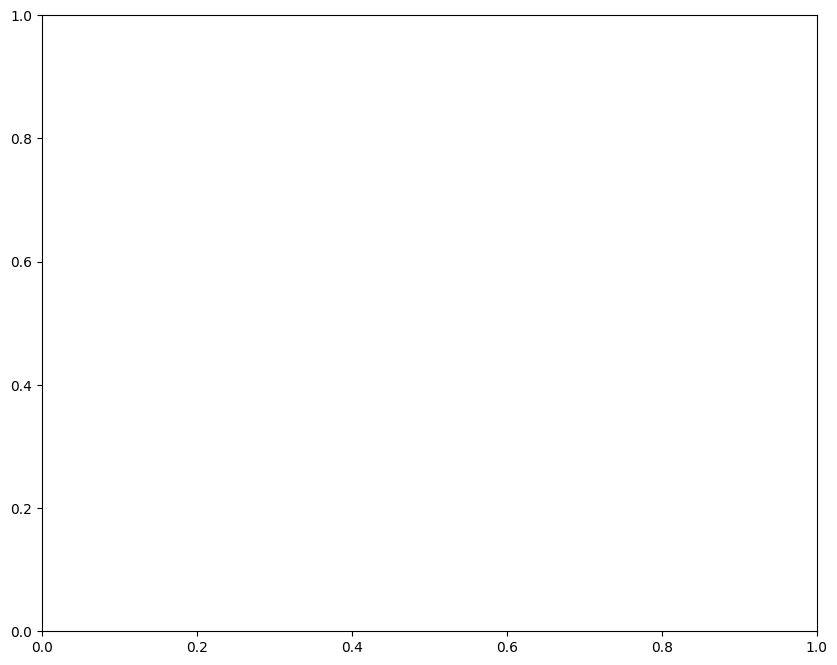

In [ ]:
import seaborn as sns

# Assuming df is your DataFrame
where = df['team'].isin(['Los Angeles Clippers', 'Portland Trail Blazers', 'Boston Celtics', 'Toronto Raptors', 'Cleveland Cavaliers'])
filtered_df = df[where]

# Aggregate the data by 'team' and calculate summary statistics for 'length'
grouped_data = filtered_df.groupby('team')['length'].describe()

# Plot the boxplot using the aggregated data
g = sns.boxplot(data=filtered_df, x="team", y="length", order=grouped_data.index)
g.figure.set_size_inches(10, 8)


In [ ]:
import regex as re
def tokenize(text):
  return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [ ]:
testtext = "NLTK is a leading platform for building Python programs to work with human language data."
testtokens = tokenize(testtext)
print(testtokens)

['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data']


In [ ]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'her', 'ain', 'in', 'aren', 'they', 'some', 'then', 'all', "aren't", 'she', 'were', "didn't", "hasn't", 'than', 'on', 'who', 'of', 'by', 'm', "should've", 'a', 'to', 'mightn', 'an', 's', 'very', 'my', 'further', 'more', 'over', "you'll", 'most', 'few', "she's", 'itself', 'it', 'your', 'did', 'do', 'or', 'under', "hadn't", 'am', 'both', "haven't", 'ma', 'herself', 'with', 'but', "weren't", 'himself', 'is', 'its', 'can', "shan't", 't', 'we', 'these', "isn't", 'any', 'same', "wasn't", 'once', "mightn't", 'doing', 'because', 'out', "shouldn't", 'wasn', 'weren', 'as', 'so', 'through', 'our', 'have', 'again', 'yourself', 'are', "won't", 'now', 'at', 'and', 'which', 'll', "needn't", "it's", 'up', 'no', 'won', 'from', 'own', 'ourselves', 'be', 've', 'such', 'o', "you've", "couldn't", 'that', 'between', 'yours', 'not', 'below', 'me', 'should', 'them', 'he', 'didn', 'had', "you'd", 'when', 'has', "mustn't", 'myself', 're', 'being', "doesn't", "don't", 'how', "that'll", 'needn', 'into', 'the', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
def remove_stop(tokens):
  return [t for t in tokens if t.lower() not in stopwords]
  cleantokens= remove_stop(testtokens)
  print(cleantokens)
     

In [ ]:
pipeline = [str.lower, tokenize, remove_stop]
     

In [ ]:
def prepare(text, pipeline):
  tokens = text
  for fun in pipeline:
    tokens = fun(tokens)
  return tokens

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'college' is the column containing text data
# Convert the 'college' column to string type
df['college'] = df['college'].astype(str)

# Now apply the tokenization function
df['tokens'] = df['college'].apply(prepare, pipeline=pipeline)


In [ ]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,length,tokens,num_tokens
424,Brandon Goodwin,68,#0,ATLANTA HAWKS,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast,18.0,"[florida, gulf, coast]",3
425,Michael Frazier,68,#21,HOUSTON ROCKETS,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,Florida,7.0,[florida],1
426,Kostas Antetokounmpo,68,#37,LOS ANGELES LAKERS,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,Dayton,6.0,[dayton],1
427,Jalen Lecque,68,#0,PHOENIX SUNS,G,06/13/00,6-3 / 1.91,190 lbs. / 86.2 kg.,$898310,USA,2019,Undrafted,Undrafted,nan,NaN,[nan],1
428,Duncan Robinson,67,#55,MIAMI HEAT,F,04/22/94,6-7 / 2.01,215 lbs. / 97.5 kg.,$1416852,USA,2018,Undrafted,Undrafted,Michigan,8.0,[michigan],1


In [ ]:
from collections import Counter

text = "The quick brown fox jumps over the lazy dog."
tokens = text.split()  # Split the text into tokens (words)

word_count = Counter(tokens)
print(word_count)


Counter({'The': 1, 'quick': 1, 'brown': 1, 'fox': 1, 'jumps': 1, 'over': 1, 'the': 1, 'lazy': 1, 'dog.': 1})


In [ ]:
more_tokens = tokenize("The quick brown fox jumps over the lazy dog.")
word_count.update(more_tokens)
print(word_count)

Counter({'The': 2, 'quick': 2, 'brown': 2, 'fox': 2, 'jumps': 2, 'over': 2, 'the': 2, 'lazy': 2, 'dog.': 1, 'dog': 1})


In [ ]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('nan', 66), ('state', 46), ('kentucky', 27), ('duke', 24), ('texas', 18)]


In [ ]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [ ]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nan,66
state,46
kentucky,27
duke,24
texas,18
michigan,15
kansas,14
carolina,13
north,13


In [ ]:
freq_df.describe()
     

,freq
count,112.000000
mean,4.714286
std,8.390716
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,66.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

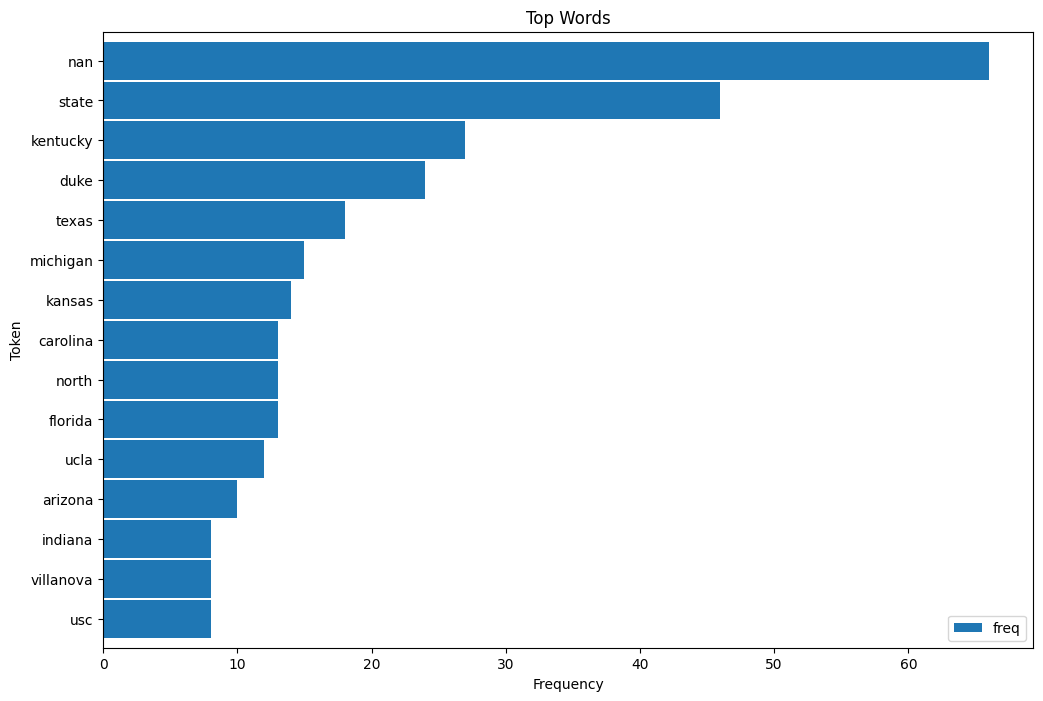

In [ ]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

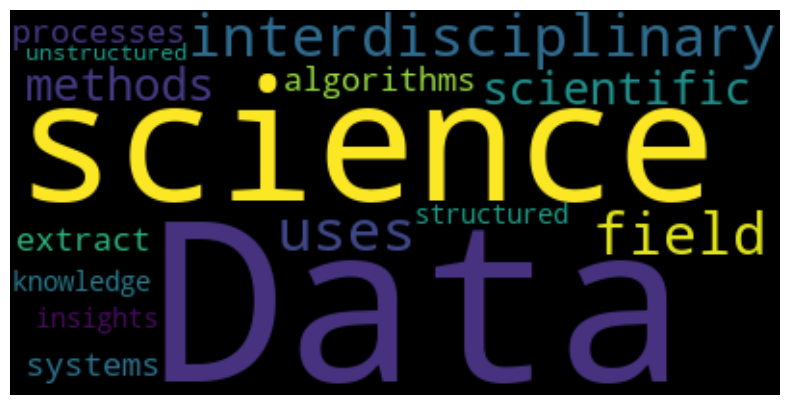

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text
text = "Data science is an interdisciplinary field that uses scientific methods, algorithms, processes, and systems to extract knowledge and insights from structured and unstructured data."

# Create a WordCloud object
wc = WordCloud(max_words=100, stopwords=stopwords)

# Generate the word cloud
wc.generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
